### Exercise from section 1.2, part 1(page 20)
Show that the weights and bias multiply by a positive constant $c>0$ in a perceptrons network, does not change the network output.

Decision of network is
$$ output = \begin{cases} 0 \quad \text{if} \quad w \cdot x + b \leq 0 \\ 1 \quad \text{if} \quad w \cdot x + b > 0 \end{cases}$$
Thus, multiply by a positive constant we get
$$ output = \begin{cases} 0 \quad \text{if} \quad c(w \cdot x + b) \leq 0 \\ 1 \quad \text{if} \quad c(w \cdot x + b) > 0 \end{cases} = \begin{cases} 0 \quad \text{if} \quad \tilde{w} \cdot x + \tilde{b} \leq 0 \\ 1 \quad \text{if} \quad \tilde{w} \cdot x + \tilde{b} > 0 \end{cases}$$
the constant $c>0$ does not change the decision boundary but just the scaling of the coefficients

### Exercise from section 1.2, part 2 (page 20)
Assuming that $w \cdot x + b \neq 0$ in a perceptron network, we replace all the neurons with sigmoid neurons and multiply by a positive constant $c>0$. We need to show that as $c \rightarrow \infty$ the behaviour of the sigmoid network is the same as the perception network.

Our sigmoid neurons are given by
$$ \sigma(z) = \frac{1}{1+\exp(-c(w \cdot x + b))} $$

thus we have that

$$ \lim{\sigma(z)}_{c\rightarrow \infty} = \frac{1}{1+\exp(-\infty)} = \frac{1}{1} = 1 $$

we get the identity transformation which is the same as the perceptional network. If $w \cdot x + b = 0$ we would instead get that 

$$ \lim{\sigma(z)}_{c \rightarrow \infty} = \frac{1}{1+\exp(c\cdot 0)} = \frac{1}{2} $$


### Exercise from section 1.5.1 (page 35)
We need to prove that $\nabla C \cdot \Delta v$ is minimized when $\Delta v = -\eta \nabla C$ where $\eta = ||\Delta v || / || \nabla C || $.
Using Cauchy-Schwarz inequality we have that
$$|\langle\ \nabla C , \Delta v\rangle| \leq ||\nabla C|| \cdot ||\Delta v|| $$
we thus get
$$-||\nabla C|| \cdot ||\Delta v|| \leq \langle\ \nabla C , \Delta v\rangle \leq ||\nabla C|| \cdot ||\Delta v||$$
Now if we choose $\Delta v = -\frac{\nabla C ||\Delta v||}{||\nabla C||}$ the middle part of the equation becomes
$$ \langle\ \nabla C , \Delta v\rangle = \nabla C \cdot \Delta v = \nabla C \cdot \left( -\frac{\nabla C ||\Delta v||}{||\nabla C||} \right) = -\frac{|| \nabla C||^2 \cdot || \Delta v ||}{||\nabla C||} =-||\nabla C|| \cdot ||\Delta v||$$
which is exactly the lower bound in the above inequality.

### Exercise from section 1.5.1 (page 35)
Gradient descent in the 1D-case corresponds to computing the slope of the tangent at the current point at the objective function, and then following it in the negative direction securing that we are allways going downhill.

### Exercise from section 3.1.1.1 (page 87)
Show that with $\sigma(z)$ being the sigmoid function, that $\sigma'(z) = \sigma(z) (1-\sigma(z))$
The sigmoid is given by
$$\sigma(z)=\frac{1}{1+\exp(-z)}$$
And if we compute it's derivative and then rewrite it
$$\sigma'(z) = \frac{\exp(-z)}{(1+\exp(-z))^2} = \frac{1}{1+\exp(-z)} \cdot \frac{\exp(-z)}{1+\exp(-z)} = \sigma(z) \cdot \frac{((1+\exp(-z))-1}{1+\exp(-z)} = \sigma(z) \left( 1- \frac{1}{(1+\exp(-z))} \right) = \sigma(z) (1-\sigma(z))$$

# Initilization for computer exercises

In [23]:
%matplotlib inline
from __future__ import division, print_function
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import theano
import theano.tensor as T
import lasagne

def plot_decision_boundary(pred_func, X, y):
    #from https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    yy = yy.astype('float32')
    xx = xx.astype('float32')
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])[:,0]
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

def onehot(t, num_classes):
    out = np.zeros((t.shape[0], num_classes))
    for row, col in enumerate(t):
        out[row, col] = 1
    return out

# Half Moon
Generation of data

In [24]:
# Generate a dataset and plot it
np.random.seed(0)
num_samples = 300

X, y = sklearn.datasets.make_moons(num_samples, noise=0.20)

X_tr = X[:100].astype('float32')
X_val = X[100:200].astype('float32')
X_te = X[200:].astype('float32')

y_tr = y[:100].astype('int32')
y_val = y[100:200].astype('int32')
y_te = y[200:].astype('int32')

num_features = X_tr.shape[-1]

## Exercise 1
Addition of a single hidden layer with 3 hidden units and ReLU as activation function

Epoch 0, Train Cost: 0.584	Val Cost: 0.520
Epoch 100, Train Cost: 0.091	Val Cost: 0.161
Epoch 200, Train Cost: 0.037	Val Cost: 0.131
Epoch 300, Train Cost: 0.023	Val Cost: 0.136
Epoch 400, Train Cost: 0.017	Val Cost: 0.145
Epoch 500, Train Cost: 0.013	Val Cost: 0.155
Epoch 600, Train Cost: 0.011	Val Cost: 0.164
Epoch 700, Train Cost: 0.009	Val Cost: 0.172
Epoch 800, Train Cost: 0.008	Val Cost: 0.180
Epoch 900, Train Cost: 0.007	Val Cost: 0.187

Test Cost: 0.075


(<matplotlib.text.Text at 0xe568d30>, <matplotlib.text.Text at 0xe206898>)

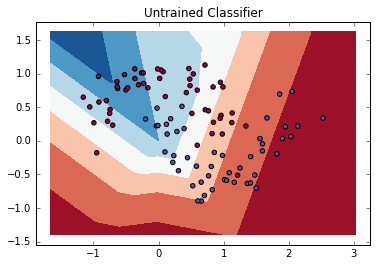

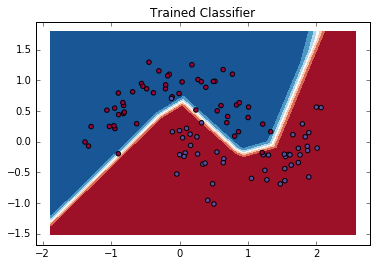

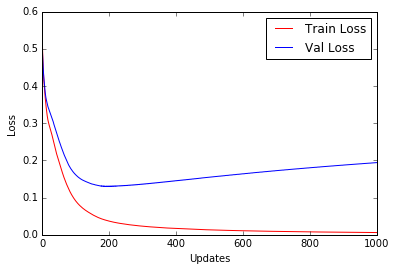

In [25]:
from lasagne.updates import sgd # stochastic gradient descent optimization algorithm.
from lasagne.nonlinearities import leaky_rectify, rectify, softmax, tanh
from lasagne.layers import InputLayer, DenseLayer

#Input layer
l_in = InputLayer(shape=(None, num_features))

#Hidden layer
l_hidden = DenseLayer(incoming=l_in, num_units=5, nonlinearity=rectify, name='hidden layer')

#Output layer
l_out = DenseLayer(incoming=l_hidden, num_units=2, nonlinearity=softmax, name='outputlayer')

sym_x = T.matrix('X') # a symbolic variable taking on the value of an input batch.
sym_t = T.ivector('target') # a symbolic variable taking on the value of the target batch.

# Get network output
train_out = lasagne.layers.get_output(l_out, {l_in: sym_x}, deterministic=False)
eval_out = lasagne.layers.get_output(l_out, {l_in: sym_x}, deterministic=True)

# Get list of all trainable parameters in the network.
all_params = lasagne.layers.get_all_params(l_out, trainable=True)

cost_train = T.nnet.categorical_crossentropy(train_out, sym_t).mean()
cost_eval = T.nnet.categorical_crossentropy(eval_out, sym_t).mean()

# Let Theano do its magic and get all the gradients we need for training. Essentially T.grad does backprop i.e. get the 
# gradient of cost_train w.r.t. the parameters.
all_grads = T.grad(cost_train, all_params)

# Set the update function for parameters 
# you might want to experiment with more advanded update schemes like rmsprob, adadelta etc.
updates = lasagne.updates.sgd(all_grads, all_params, learning_rate=1.0)

f_eval = theano.function(inputs=[sym_x, sym_t],
                         outputs=[cost_eval, eval_out])

f_train = theano.function(inputs=[sym_x, sym_t],
                          outputs=[cost_train, eval_out],
                          updates=updates)

#This us just a helper function for plotting the decision boundaries between the two classes
f_pred = theano.function(inputs=[sym_x],
                         outputs=eval_out)

# Training loop
plot_decision_boundary(lambda x: f_pred(x), X_val,y_val)
plt.title("Untrained Classifier")

num_epochs = 1000
train_cost, val_cost = [],[]
for e in range(num_epochs):
    out = f_train(X_tr,y_tr)
    #out = [cost, y_pred]
    train_cost += [out[0]]
    
    out = f_eval(X_val,y_val)
    val_cost += [out[0]]

    if e % 100 == 0:
        print("Epoch %i, Train Cost: %0.3f\tVal Cost: %0.3f"%(e, train_cost[-1],val_cost[-1]))
    
    
out = f_eval(X_te,y_te)
test_cost = out[0]
print("\nTest Cost: %0.3f"%(test_cost))

plot_decision_boundary(lambda x: f_pred(x), X_te, y_te)
plt.title("Trained Classifier")

epoch = np.arange(len(train_cost))
plt.figure()
plt.plot(epoch,train_cost,'r',epoch,val_cost,'b')
plt.legend(['Train Loss','Val Loss'])
plt.xlabel('Updates'), plt.ylabel('Loss')

As we can see from the plot, the decision boundary is now non-linear and that the training error have been significantly reduced compared to the performance of the logistic regression. The validation error shows that our network does not generalize to new data, since the error is still large.

## Exercise 2

Now we try with different combinations of number of hidden layers (1,2,3) and number of hidden units (3 and 5) in each layer.

Network with 1 layers and 3 hidden units. (Training, Validation, Test) = (0.263,0.301,0.237)
Network with 2 layers and 3 hidden units. (Training, Validation, Test) = (0.002,0.206,0.065)
Network with 3 layers and 3 hidden units. (Training, Validation, Test) = (0.445,0.460,0.485)
Network with 1 layers and 5 hidden units. (Training, Validation, Test) = (0.006,0.201,0.078)
Network with 2 layers and 5 hidden units. (Training, Validation, Test) = (0.009,0.279,0.161)
Network with 3 layers and 5 hidden units. (Training, Validation, Test) = (0.000,0.354,0.085)


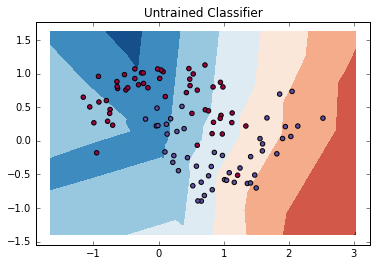

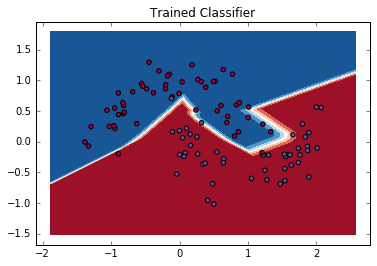

In [26]:
def trainer(number_of_layers, number_of_units,plot=False):
    #Input layer
    l_in = InputLayer(shape=(None, num_features))
    
    #Hidden layer (s)
    if number_of_layers == 1:
        l_hidden1 = DenseLayer(incoming=l_in, num_units=number_of_units, nonlinearity=rectify, name='hidden layer')
        l_out = DenseLayer(incoming=l_hidden1, num_units=2, nonlinearity=softmax, name='outputlayer')
    elif number_of_layers == 2:
        l_hidden1 = DenseLayer(incoming=l_in, num_units=number_of_units, nonlinearity=rectify, name='hidden layer')
        l_hidden2 = DenseLayer(incoming=l_hidden1, num_units=number_of_units, nonlinearity=rectify, name='hidden layer')
        l_out = DenseLayer(incoming=l_hidden2, num_units=2, nonlinearity=softmax, name='outputlayer')
    elif number_of_layers == 3:
        l_hidden1 = DenseLayer(incoming=l_in, num_units=number_of_units, nonlinearity=rectify, name='hidden layer')
        l_hidden2 = DenseLayer(incoming=l_hidden1, num_units=number_of_units, nonlinearity=rectify, name='hidden layer')
        l_hidden3 = DenseLayer(incoming=l_hidden2, num_units=number_of_units, nonlinearity=rectify, name='hidden layer')
        l_out = DenseLayer(incoming=l_hidden3, num_units=2, nonlinearity=softmax, name='outputlayer')

    sym_x = T.matrix('X') # a symbolic variable taking on the value of an input batch.
    sym_t = T.ivector('target') # a symbolic variable taking on the value of the target batch.

    # Get network output
    train_out = lasagne.layers.get_output(l_out, {l_in: sym_x}, deterministic=False)
    eval_out = lasagne.layers.get_output(l_out, {l_in: sym_x}, deterministic=True)

    # Get list of all trainable parameters in the network.
    all_params = lasagne.layers.get_all_params(l_out, trainable=True)

    cost_train = T.nnet.categorical_crossentropy(train_out, sym_t).mean()
    cost_eval = T.nnet.categorical_crossentropy(eval_out, sym_t).mean()

    # Let Theano do its magic and get all the gradients we need for training. Essentially T.grad does backprop i.e. get the 
    # gradient of cost_train w.r.t. the parameters.
    all_grads = T.grad(cost_train, all_params)

    # Set the update function for parameters 
    # you might want to experiment with more advanded update schemes like rmsprob, adadelta etc.
    updates = lasagne.updates.sgd(all_grads, all_params, learning_rate=1.0)

    f_eval = theano.function(inputs=[sym_x, sym_t],
                         outputs=[cost_eval, eval_out])

    f_train = theano.function(inputs=[sym_x, sym_t],
                          outputs=[cost_train, eval_out],
                          updates=updates)

    #This us just a helper function for plotting the decision boundaries between the two classes
    f_pred = theano.function(inputs=[sym_x],
                         outputs=eval_out)
    if plot:
        plot_decision_boundary(lambda x: f_pred(x), X_val,y_val)
        plt.title("Untrained Classifier")
    
    num_epochs = 1000
    train_cost, val_cost = [],[]
    for e in range(num_epochs):
        out = f_train(X_tr,y_tr)
        #out = [cost, y_pred]
        train_cost += [out[0]]
    
        out = f_eval(X_val,y_val)
        val_cost += [out[0]]

    out = f_eval(X_te,y_te)
    test_cost = out[0]
    
    if plot:
        plot_decision_boundary(lambda x: f_pred(x), X_te, y_te)
        plt.title("Trained Classifier")
    
    print("Network with %i layers and %i hidden units. (Training, Validation, Test) = (%0.3f,%0.3f,%0.3f)"
          %(number_of_layers, number_of_units,train_cost[-1],val_cost[-1],test_cost))
    return train_cost, val_cost, test_cost
trainer(1,3)
trainer(2,3)
trainer(3,3)
trainer(1,5)
trainer(2,5,True)
c1,c2,c3 = trainer(3,5)

We can clearly see from the numbers that the more layers/more hidden units, the less training error we get, because the decision boundary of the network becomes very flexible. However, both the validation and test error does not follow this pattern, which means that the more complicated networks overfit.

## Exercise 3
We now try to plot the errors for a neural network with 3 hidden layers with 5 hidden nodes in each

(<matplotlib.text.Text at 0xd2579b0>, <matplotlib.text.Text at 0x10ed7a90>)

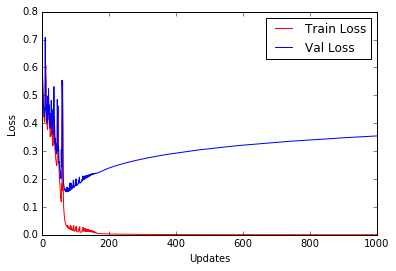

In [27]:
epoch = np.arange(len(c1))
plt.figure()
plt.plot(epoch,c1,'r',epoch,c2,'b')
plt.legend(['Train Loss','Val Loss'])
plt.xlabel('Updates'), plt.ylabel('Loss')

From the figure it is clear that we are overfitting, since the validation error is increasing with the number of updates. The weights become to tuned for the training set, and does not generalize to other datasets. However, we get a 0 % error on the training set.
## Exercise 4
We now use a Adam-gradient approch for updating, thus we should see that it converges faster

In [28]:
#Input layer
l_in = InputLayer(shape=(None, num_features))
    
#Hidden layer (s)
l_hidden1 = DenseLayer(incoming=l_in, num_units=5, nonlinearity=rectify, name='hidden layer')
l_out = DenseLayer(incoming=l_hidden1, num_units=2, nonlinearity=softmax, name='outputlayer')

sym_x = T.matrix('X') # a symbolic variable taking on the value of an input batch.
sym_t = T.ivector('target') # a symbolic variable taking on the value of the target batch.

# Get network output
train_out = lasagne.layers.get_output(l_out, {l_in: sym_x}, deterministic=False)
eval_out = lasagne.layers.get_output(l_out, {l_in: sym_x}, deterministic=True)

# Get list of all trainable parameters in the network.
all_params = lasagne.layers.get_all_params(l_out, trainable=True)

cost_train = T.nnet.categorical_crossentropy(train_out, sym_t).mean()
cost_eval = T.nnet.categorical_crossentropy(eval_out, sym_t).mean()

# Let Theano do its magic and get all the gradients we need for training. Essentially T.grad does backprop i.e. get the 
# gradient of cost_train w.r.t. the parameters.
all_grads = T.grad(cost_train, all_params)

# Set the update function for parameters 
# you might want to experiment with more advanded update schemes like rmsprob, adadelta etc.
updates = lasagne.updates.adam(all_grads, all_params, learning_rate=1)

f_eval = theano.function(inputs=[sym_x, sym_t],
                         outputs=[cost_eval, eval_out])

f_train = theano.function(inputs=[sym_x, sym_t],
                          outputs=[cost_train, eval_out],
                          updates=updates)

#This us just a helper function for plotting the decision boundaries between the two classes
f_pred = theano.function(inputs=[sym_x],
                         outputs=eval_out)

num_epochs = 1000
train_cost, val_cost = [],[]
for e in range(num_epochs):
    out = f_train(X_tr,y_tr)
    #out = [cost, y_pred]
    train_cost += [out[0]]
    
    out = f_eval(X_val,y_val)
    val_cost += [out[0]]

    if e % 100 == 0:
        print("Epoch %i, Train Cost: %0.3f\tVal Cost: %0.3f"%(e, train_cost[-1],val_cost[-1]))
    
    
out = f_eval(X_te,y_te)
test_cost = out[0]
print("\nTest Cost: %0.3f"%(test_cost))
    


Epoch 0, Train Cost: 0.656	Val Cost: 0.680
Epoch 100, Train Cost: 0.263	Val Cost: 0.313
Epoch 200, Train Cost: 0.265	Val Cost: 0.330
Epoch 300, Train Cost: 0.263	Val Cost: 0.329
Epoch 400, Train Cost: 0.266	Val Cost: 0.336
Epoch 500, Train Cost: 0.269	Val Cost: 0.334
Epoch 600, Train Cost: 0.263	Val Cost: 0.332
Epoch 700, Train Cost: 0.273	Val Cost: 0.304
Epoch 800, Train Cost: 0.262	Val Cost: 0.303
Epoch 900, Train Cost: 0.267	Val Cost: 0.314

Test Cost: 0.219


If we compare these numbers, to using the sgd updating-scheme we observe that adam converges much faster (after 100 epoch). However the training cost is much higher in this case, and it have therefore not converged to the right minimum. 

# MNIST Exercise
Load of data

In [29]:
elu = lambda x: (x > 0)*x + (1 - (x > 0))*(np.exp(x) - 1) 
#To speed up training we'll only work on a subset of the data
data = np.load('mnist.npz')
num_classes = 10
x_train = data['X_train'][:1000].astype('float32')
targets_train = data['y_train'][:1000].astype('int32')

x_valid = data['X_valid'][:500].astype('float32')
targets_valid = data['y_valid'][:500].astype('int32')

x_test = data['X_test'][:500].astype('float32')
targets_test = data['y_test'][:500].astype('int32')

## Exercise 1
We now fit a neural network to the MNIST datset to see the performance

Epoch 10 : Train Loss 3.453088e-02 , Train acc 0.927000,  Valid acc 0.832000 
Epoch 20 : Train Loss 2.227916e-02 , Train acc 0.954000,  Valid acc 0.840000 
Epoch 30 : Train Loss 1.587594e-02 , Train acc 0.972000,  Valid acc 0.842000 
Epoch 40 : Train Loss 1.171068e-02 , Train acc 0.987000,  Valid acc 0.844000 
Epoch 50 : Train Loss 8.857783e-03 , Train acc 0.996000,  Valid acc 0.840000 
Epoch 60 : Train Loss 6.878220e-03 , Train acc 0.998000,  Valid acc 0.838000 
Epoch 70 : Train Loss 5.491309e-03 , Train acc 1.000000,  Valid acc 0.838000 
Epoch 80 : Train Loss 4.498520e-03 , Train acc 1.000000,  Valid acc 0.836000 
Epoch 90 : Train Loss 3.766911e-03 , Train acc 1.000000,  Valid acc 0.836000 
Epoch 100 : Train Loss 3.212749e-03 , Train acc 1.000000,  Valid acc 0.836000 


(<matplotlib.text.Text at 0x11bf7b70>, <matplotlib.text.Text at 0x11c0c6d8>)

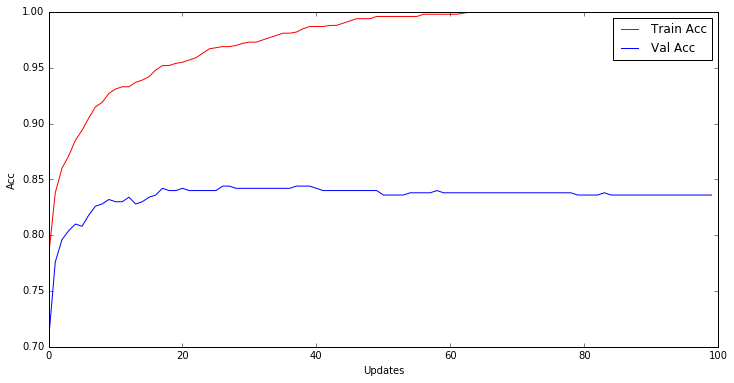

In [30]:
#define the model
num_class = 10
num_features = x_train.shape[1]

l_in = InputLayer(shape=(None,num_features))
l_hid = DenseLayer(incoming=l_in, num_units=500, nonlinearity=elu)
l_out = DenseLayer(incoming=l_hid, num_units=num_class, nonlinearity=softmax)

sym_x = T.matrix('sym_x') # a symbolic variable taking on the value of a input batch.
sym_t = T.ivector('sym_t') # a symbolic variable taking on the value of the target batch.

# Get network output
train_out = lasagne.layers.get_output(l_out, sym_x, deterministic=False)
eval_out = lasagne.layers.get_output(l_out, sym_x, deterministic=True)


# Get list of all trainable parameters in the network.
all_params = lasagne.layers.get_all_params(l_out, trainable=True)

cost = T.nnet.categorical_crossentropy(train_out+1e-8, sym_t).mean()
# Let Theano do its magic and get all the gradients we need for training
all_grads = T.grad(cost, all_params)


# Set the update function for parameters 
# you might wan't to experiment with more advanded update schemes like rmsprob, adadelta etc.
updates = lasagne.updates.sgd(all_grads, all_params, learning_rate=0.1)


f_eval = theano.function([sym_x],
                     eval_out, on_unused_input='warn')

f_train = theano.function([sym_x, sym_t],
                          [cost],
                          updates=updates, on_unused_input='warn')

from confusionmatrix import ConfusionMatrix
batch_size = 100
num_epochs = 100
learning_rate = 0.1
num_samples_train = x_train.shape[0]
num_batches_train = num_samples_train // batch_size
num_samples_valid = x_valid.shape[0]
num_batches_valid = num_samples_valid // batch_size

train_acc, train_loss = [], []
valid_acc, valid_loss = [], []
test_acc, test_loss = [], []
cur_loss = 0
loss = []
for epoch in range(num_epochs):
    #Forward->Backprob->Update params
    cur_loss = 0
    for i in range(num_batches_train):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_train[idx]
        target_batch = targets_train[idx]    
        batch_loss = f_train(x_batch,target_batch) #this will do the complete backprob pass
        cur_loss += batch_loss[0]
    loss += [cur_loss/batch_size]
    
    confusion_valid = ConfusionMatrix(num_classes)
    confusion_train = ConfusionMatrix(num_classes)

    for i in range(num_batches_train):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_train[idx]
        targets_batch = targets_train[idx]
        net_out = f_eval(x_batch)   
        preds = np.argmax(net_out, axis=-1) 
        confusion_train.batch_add(targets_batch, preds)

    confusion_valid = ConfusionMatrix(num_classes)
    for i in range(num_batches_valid):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_valid[idx]
        targets_batch = targets_valid[idx]
        net_out = f_eval(x_batch)   
        preds = np.argmax(net_out, axis=-1) 
        
        confusion_valid.batch_add(targets_batch, preds)
    
    train_acc_cur = confusion_train.accuracy()
    valid_acc_cur = confusion_valid.accuracy()

    train_acc += [train_acc_cur]
    valid_acc += [valid_acc_cur]
    if (epoch+1) % 10 == 0:
        print("Epoch %i : Train Loss %e , Train acc %f,  Valid acc %f " \
        % (epoch+1, loss[-1], train_acc_cur, valid_acc_cur))
    
epoch = np.arange(len(train_acc))
plt.figure(figsize=(12,6))
plt.plot(epoch,train_acc,'r',epoch,valid_acc,'b')
plt.legend(['Train Acc','Val Acc'])
plt.xlabel('Updates'), plt.ylabel('Acc')

If the network was overfitting, we should see that the validation accuracy decreased as we updated the weights in the network. However, since this is not the case, the network seems to fit the data well. Ofcouse the training accuracy is higher than the validation accuracy, because the network is trained on the training set.

## Exercise 2
We now try to add a dropout layer to the network to avoid overfitting

Epoch 10 : Train Loss 3.846509e-02 , Train acc 0.921000,  Valid acc 0.834000 
Epoch 20 : Train Loss 2.589651e-02 , Train acc 0.948000,  Valid acc 0.840000 
Epoch 30 : Train Loss 1.996567e-02 , Train acc 0.969000,  Valid acc 0.838000 
Epoch 40 : Train Loss 1.588723e-02 , Train acc 0.978000,  Valid acc 0.828000 
Epoch 50 : Train Loss 1.293394e-02 , Train acc 0.988000,  Valid acc 0.834000 
Epoch 60 : Train Loss 1.057726e-02 , Train acc 0.995000,  Valid acc 0.840000 
Epoch 70 : Train Loss 8.166982e-03 , Train acc 0.996000,  Valid acc 0.836000 
Epoch 80 : Train Loss 7.091724e-03 , Train acc 0.999000,  Valid acc 0.838000 
Epoch 90 : Train Loss 6.129210e-03 , Train acc 1.000000,  Valid acc 0.836000 
Epoch 100 : Train Loss 5.590515e-03 , Train acc 1.000000,  Valid acc 0.836000 


(<matplotlib.text.Text at 0xa32fa90>, <matplotlib.text.Text at 0xa731a20>)

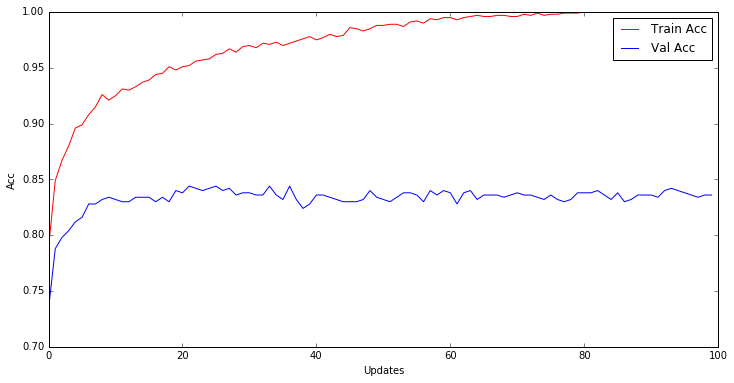

In [31]:
#define the model
num_class = 10
num_features = x_train.shape[1]

l_in = InputLayer(shape=(None,num_features))
l_hid = DenseLayer(incoming=l_in, num_units=500, nonlinearity=elu)
l_drop = lasagne.layers.DropoutLayer(l_hid, p=0.5, rescale=True)
l_out = DenseLayer(incoming=l_drop, num_units=num_class, nonlinearity=softmax)

sym_x = T.matrix('sym_x') # a symbolic variable taking on the value of a input batch.
sym_t = T.ivector('sym_t') # a symbolic variable taking on the value of the target batch.

# Get network output
train_out = lasagne.layers.get_output(l_out, sym_x, deterministic=False)
eval_out = lasagne.layers.get_output(l_out, sym_x, deterministic=True)


# Get list of all trainable parameters in the network.
all_params = lasagne.layers.get_all_params(l_out, trainable=True)

cost = T.nnet.categorical_crossentropy(train_out+1e-8, sym_t).mean()
# Let Theano do its magic and get all the gradients we need for training
all_grads = T.grad(cost, all_params)


# Set the update function for parameters 
# you might wan't to experiment with more advanded update schemes like rmsprob, adadelta etc.
updates = lasagne.updates.sgd(all_grads, all_params, learning_rate=0.1)


f_eval = theano.function([sym_x],
                     eval_out, on_unused_input='warn')

f_train = theano.function([sym_x, sym_t],
                          [cost],
                          updates=updates, on_unused_input='warn')

from confusionmatrix import ConfusionMatrix
batch_size = 100
num_epochs = 100
learning_rate = 0.1
num_samples_train = x_train.shape[0]
num_batches_train = num_samples_train // batch_size
num_samples_valid = x_valid.shape[0]
num_batches_valid = num_samples_valid // batch_size

train_acc, train_loss = [], []
valid_acc, valid_loss = [], []
test_acc, test_loss = [], []
cur_loss = 0
loss = []
for epoch in range(num_epochs):
    #Forward->Backprob->Update params
    cur_loss = 0
    for i in range(num_batches_train):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_train[idx]
        target_batch = targets_train[idx]    
        batch_loss = f_train(x_batch,target_batch) #this will do the complete backprob pass
        cur_loss += batch_loss[0]
    loss += [cur_loss/batch_size]
    
    confusion_valid = ConfusionMatrix(num_classes)
    confusion_train = ConfusionMatrix(num_classes)

    for i in range(num_batches_train):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_train[idx]
        targets_batch = targets_train[idx]
        net_out = f_eval(x_batch)   
        preds = np.argmax(net_out, axis=-1) 
        confusion_train.batch_add(targets_batch, preds)

    confusion_valid = ConfusionMatrix(num_classes)
    for i in range(num_batches_valid):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_valid[idx]
        targets_batch = targets_valid[idx]
        net_out = f_eval(x_batch)   
        preds = np.argmax(net_out, axis=-1) 
        
        confusion_valid.batch_add(targets_batch, preds)
    
    train_acc_cur = confusion_train.accuracy()
    valid_acc_cur = confusion_valid.accuracy()

    train_acc += [train_acc_cur]
    valid_acc += [valid_acc_cur]
    if (epoch+1) % 10 == 0:
        print("Epoch %i : Train Loss %e , Train acc %f,  Valid acc %f " \
        % (epoch+1, loss[-1], train_acc_cur, valid_acc_cur))
    
epoch = np.arange(len(train_acc))
plt.figure(figsize=(12,6))
plt.plot(epoch,train_acc,'r',epoch,valid_acc,'b')
plt.legend(['Train Acc','Val Acc'])
plt.xlabel('Updates'), plt.ylabel('Acc')

We see that the accuracy is less smooth when using dropout to regulize the network. This makes sense since half the neurons (randomly chosen) are zero in each update step. However, we still see an training accuracy of 100 % and validation accuracy of 80-85 %.

## Exercise 3
Instead of using dropout to regulize the network, we now add a L2 penalty such that sum of all squared weights are added to the cost function. In this way the weights cannot become too large.

Epoch 10 : Train Loss 3.157608e+01 , Train acc 0.920000,  Valid acc 0.830000 
Epoch 20 : Train Loss 3.156381e+01 , Train acc 0.950000,  Valid acc 0.834000 
Epoch 30 : Train Loss 3.155734e+01 , Train acc 0.970000,  Valid acc 0.832000 
Epoch 40 : Train Loss 3.155311e+01 , Train acc 0.983000,  Valid acc 0.836000 
Epoch 50 : Train Loss 3.155017e+01 , Train acc 0.994000,  Valid acc 0.830000 
Epoch 60 : Train Loss 3.154811e+01 , Train acc 0.998000,  Valid acc 0.828000 
Epoch 70 : Train Loss 3.154666e+01 , Train acc 1.000000,  Valid acc 0.828000 
Epoch 80 : Train Loss 3.154561e+01 , Train acc 1.000000,  Valid acc 0.826000 
Epoch 90 : Train Loss 3.154485e+01 , Train acc 1.000000,  Valid acc 0.826000 
Epoch 100 : Train Loss 3.154427e+01 , Train acc 1.000000,  Valid acc 0.828000 


(<matplotlib.text.Text at 0xde59710>, <matplotlib.text.Text at 0xe5887b8>)

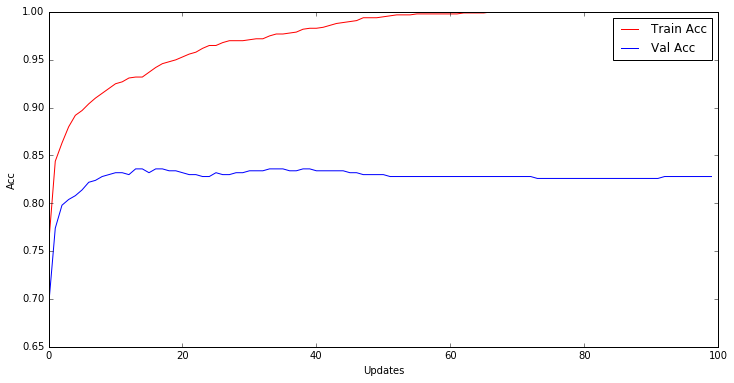

In [32]:
from lasagne.regularization import apply_penalty, l2
#define the model
num_class = 10
num_features = x_train.shape[1]

l_in = InputLayer(shape=(None,num_features))
l_hid = DenseLayer(incoming=l_in, num_units=500, nonlinearity=elu)
l_out = DenseLayer(incoming=l_hid, num_units=num_class, nonlinearity=softmax)

sym_x = T.matrix('sym_x') # a symbolic variable taking on the value of a input batch.
sym_t = T.ivector('sym_t') # a symbolic variable taking on the value of the target batch.

# Get network output
train_out = lasagne.layers.get_output(l_out, sym_x, deterministic=False)
eval_out = lasagne.layers.get_output(l_out, sym_x, deterministic=True)


# Get list of all trainable parameters in the network.
all_params = lasagne.layers.get_all_params(l_out, regularizable=True) # Goes recursively through all layers attached to the l_out layer
l2_cost = apply_penalty(reg_params,l2)
l2_weight = 0.5 # Some chosen value
cost = T.nnet.categorical_crossentropy(train_out+1e-8, sym_t).mean() + l2_weight*l2_cost

# Let Theano do its magic and get all the gradients we need for training
all_grads = T.grad(cost, all_params)


# Set the update function for parameters 
# you might wan't to experiment with more advanded update schemes like rmsprob, adadelta etc.
updates = lasagne.updates.sgd(all_grads, all_params, learning_rate=0.1)


f_eval = theano.function([sym_x],
                     eval_out, on_unused_input='warn')

f_train = theano.function([sym_x, sym_t],
                          [cost],
                          updates=updates, on_unused_input='warn')

from confusionmatrix import ConfusionMatrix
batch_size = 100
num_epochs = 100
learning_rate = 0.1
num_samples_train = x_train.shape[0]
num_batches_train = num_samples_train // batch_size
num_samples_valid = x_valid.shape[0]
num_batches_valid = num_samples_valid // batch_size

train_acc, train_loss = [], []
valid_acc, valid_loss = [], []
test_acc, test_loss = [], []
cur_loss = 0
loss = []



for epoch in range(num_epochs):
    #Forward->Backprob->Update params
    cur_loss = 0
    for i in range(num_batches_train):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_train[idx]
        target_batch = targets_train[idx]    
        batch_loss = f_train(x_batch,target_batch) #this will do the complete backprob pass
        cur_loss += batch_loss[0]
    loss += [cur_loss/batch_size]
    
    confusion_valid = ConfusionMatrix(num_classes)
    confusion_train = ConfusionMatrix(num_classes)

    for i in range(num_batches_train):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_train[idx]
        targets_batch = targets_train[idx]
        net_out = f_eval(x_batch)   
        preds = np.argmax(net_out, axis=-1) 
        confusion_train.batch_add(targets_batch, preds)

    confusion_valid = ConfusionMatrix(num_classes)
    for i in range(num_batches_valid):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_valid[idx]
        targets_batch = targets_valid[idx]
        net_out = f_eval(x_batch)   
        preds = np.argmax(net_out, axis=-1) 
        
        confusion_valid.batch_add(targets_batch, preds)
    
    train_acc_cur = confusion_train.accuracy()
    valid_acc_cur = confusion_valid.accuracy()

    train_acc += [train_acc_cur]
    valid_acc += [valid_acc_cur]
    if (epoch+1) % 10 == 0:
        print("Epoch %i : Train Loss %e , Train acc %f,  Valid acc %f " \
        % (epoch+1, loss[-1], train_acc_cur, valid_acc_cur))
    
epoch = np.arange(len(train_acc))
plt.figure(figsize=(12,6))
plt.plot(epoch,train_acc,'r',epoch,valid_acc,'b')
plt.legend(['Train Acc','Val Acc'])
plt.xlabel('Updates'), plt.ylabel('Acc')


We see that we get approximatly the same pattern as in the last two networks, however this convergence patterns seems to be more smooth because the weights are bounded by how large they can be.